In [ ]:
#========================================
#                                 VGG-16 Model 
#========================================

In [ ]:
# The VGG-16 model is a deep learning model consisting of 16 layers created by the Visual Geometry Group (VGG) team at the University of Oxford.
# It is a convolutional neural network that came in second place in the 2014 ILSVRC.

# VGG-16 is divided into two modules: features and classifier.
# There are 38 layers in total, but only the convolutional and fully connected layers are counted.

In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [ ]:
# PyTorch is 0.4.1.
# torchvision is 0.2.1
# This program uses the above versions.
# If necessary, you can install it by using the following command.

# pip install torch==0.4.1
# pip install torchvision==0.2.1

In [2]:
# Using a trained VGG16 model
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

# Structure of the VGG16 model
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [3]:
# Image preprocessing
class BaseTransform():
    
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([transforms.Resize(resize),
                                                                                      transforms.CenterCrop(resize),
                                                                                      transforms.ToTensor(),
                                                                                      transforms.Normalize(mean, std)])
    
    def __call__(self, img):
        return self.base_transform(img)

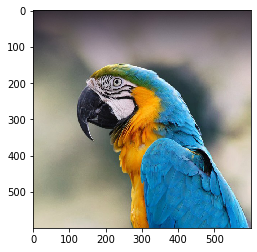

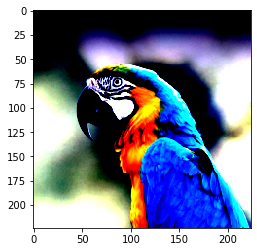

In [4]:
# Loading images
image_file_path = './data/1.jpg'
img = Image.open(image_file_path)

# Show image
plt.imshow(img)
plt.show()

# Image preprocessing
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)

# Show pre-processed image
plt.imshow(img_transformed)
plt.show()

In [5]:
# Post-processing to predict the label
class ILSVRCPredictor():
    
    def __init__(self, class_index):
        self.class_index = class_index
        
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        
        return predicted_label_name

In [6]:
# Function to perform image prediction
def ImageClassification(image_file_path, ILSVRC_index):
    
    predictor = ILSVRCPredictor(ILSVRC_index)
    
    # Loading and viewing images
    img = Image.open(image_file_path)
    plt.imshow(img)
    plt.show
    
    # Image preprocessing
    transform = BaseTransform(resize, mean, std)
    img_transformed = transform(img)
    inputs = img_transformed.unsqueeze_(0)
    
    # Enter an image into the model and convert it to a label
    out = vgg16(inputs)
    result = predictor.predict_max(out)
    
    # Output labels
    print("Predicted result : ", result)

In [7]:
# Reading label data
ILSVRC_index = json.load(open('./data/ILSVRC_index.json'))

# View Labels
#ILSVRC_index

Predicted result :  macaw


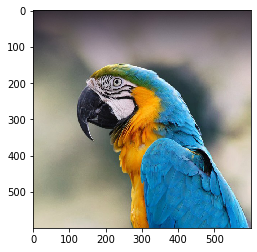

In [8]:
# Specify the image
image_file_path = './data/1.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  albatross


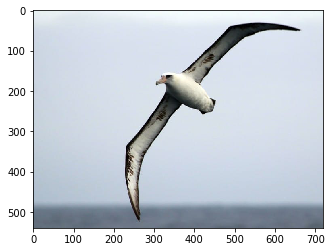

In [9]:
# Specify the image
image_file_path = './data/2.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  giant_schnauzer


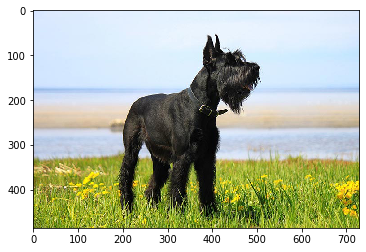

In [10]:
# Specify the image
image_file_path = './data/3.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  ox


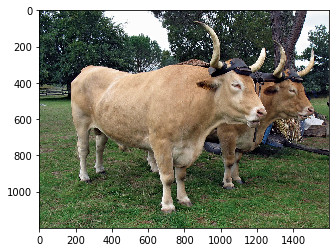

In [11]:
# Specify the image
image_file_path = './data/4.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  mosque


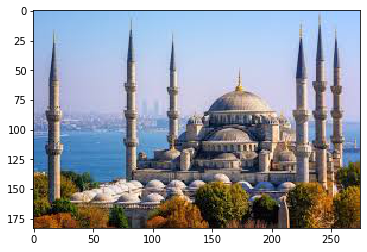

In [12]:
# Specify the image
image_file_path = './data/5.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  church


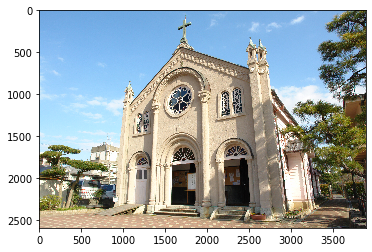

In [13]:
# Specify the image
image_file_path = './data/6.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  restaurant


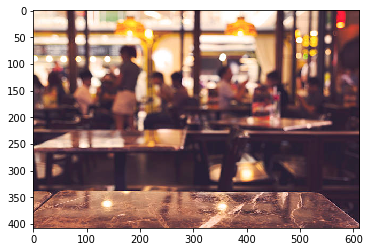

In [14]:
# Specify the image
image_file_path = './data/7.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  pedestal


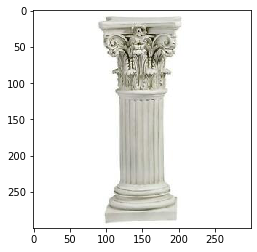

In [15]:
# Specify the image
image_file_path = './data/8.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  crib


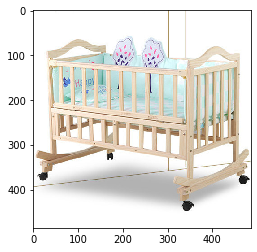

In [16]:
# Specify the image
image_file_path = './data/9.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  apron


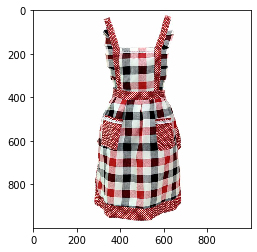

In [17]:
# Specify the image
image_file_path = './data/10.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

In [ ]:
# Try it out with another image.